In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

from openpathsampling.analysis.tis_analysis import TISTransition
from openpathsampling.analysis.tis_analysis import sampleset_sample_generator

storage = paths.storage.Storage("toy_retis.nc", mode="r")

In [49]:
print len(storage.sampleset)

3003


In [50]:
retis = storage.transition.load(0)

In [51]:
%%time
# retis.move_summary()

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 9.06 µs


In [52]:
%%time
# retis.move_summary('shooting')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [53]:
# TODO path tree here
# TODO count decorrelated paths

In [54]:
retis.ensemble_histogram_info['pathlength'].hist_args = { 'bin_width' : 5, 'bin_range' : (0, 150) }
retis.ensemble_histogram_info['max_lambda'].hist_args = { 'bin_width' : 0.02, 'bin_range' : (-0.35, 0.35) }

In [55]:
%%time
retis.all_statistics(storage=storage, weights=None, force=True)

CPU times: user 2min 11s, sys: 3.38 s, total: 2min 14s
Wall time: 3min 20s


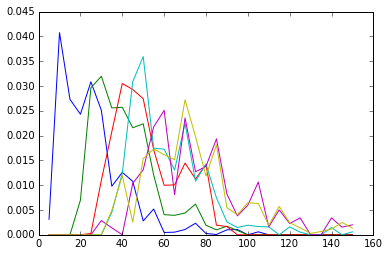

In [56]:
for ens in retis.ensembles:
    myhist = retis.histograms['pathlength'][ens]
    plt.plot(myhist.plot_bins(), myhist.normalized())

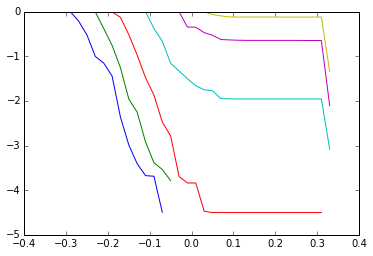

In [57]:
for ens in retis.ensembles:
    myhist = retis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), 
             np.log(myhist.reverse_cumulative())
            )

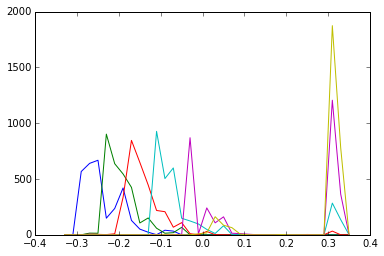

In [58]:
for ens in retis.ensembles:
    myhist = retis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), myhist())

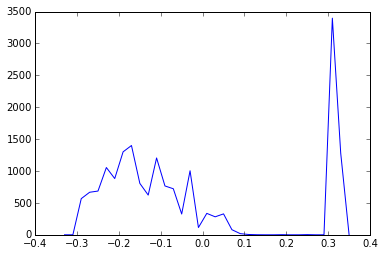

In [59]:
# TODO: add a histogram.sum_hist() function to add several histograms together
from operator import add
total_sampling = np.zeros(len(retis.histograms['max_lambda'][retis.ensembles[0]]()))
for ens in retis.ensembles:
    total_sampling = map(add, total_sampling, retis.histograms['max_lambda'][ens]())
plt.plot(myhist.plot_bins(), total_sampling);

In [60]:
from toy_plot_helpers import ToyPlot
plot = ToyPlot()
plot.add_pes(storage.engine.load(0).pes)

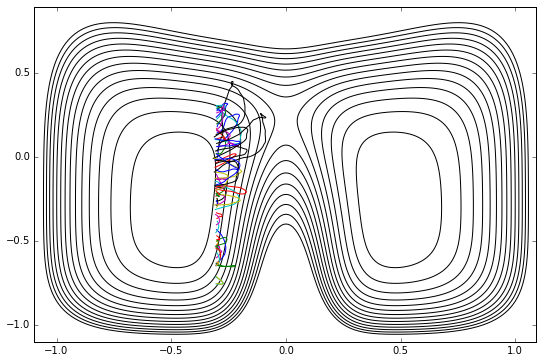

In [61]:
ens0_traj = [s.trajectory for s in storage.sample if s.ensemble == retis.ensembles[0]]
plt.contour(plot.X, plot.Y, plot._pes, levels=np.arange(0.0, 1.5, 0.1), colors='k')
for mytraj in ens0_traj[slice(None,None,10)]:
    plt.plot(mytraj.coordinates()[:,0,0], mytraj.coordinates()[:,0,1])

In [62]:
wham = retis.total_crossing_probability(method="wham")

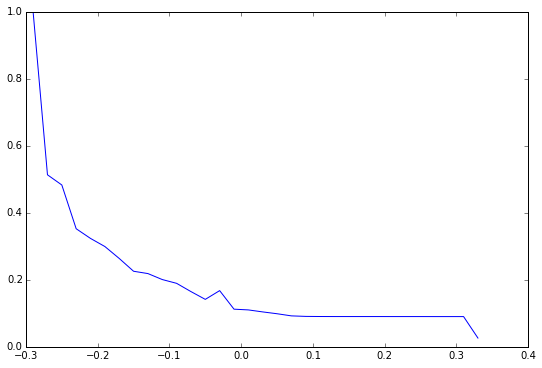

In [63]:
plt.plot(wham.keys(), wham.values());

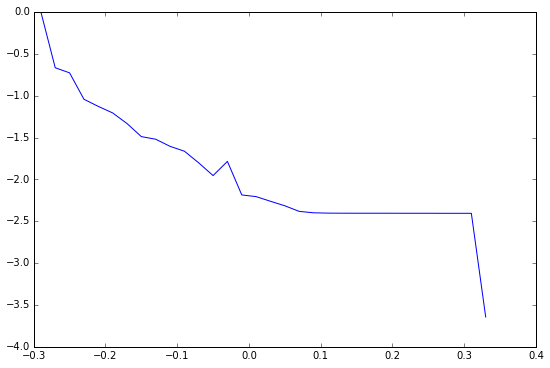

In [64]:
plt.plot(wham.keys(), np.log(wham.values()));

In [73]:
%%time
#retis.rate(storage=storage)
# TODO: conditional_transition_probability, minus_flux, rate

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


In [ ]:
#print retis.flux, retis.tcp(0.0), retis.ctp[retis.ensembles[-1]]